In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy.stats import norm

In [5]:
cwd = os.getcwd()
df = pd.read_csv(f"{cwd}/7-29_acc_df.csv")
umap_pca_algs = ['pca','$\\alpha = $0.25','$\\alpha = $0.5','$\\alpha = $0.75','umap']
up_df = df[df['algorithm'].isin(umap_pca_algs)]
x_map = {'pca': 0, '$\\alpha = $0.25': 0.25, '$\\alpha = $0.5': 0.5, '$\\alpha = $0.75': 0.75, 'umap': 1}
inv_x_map = {v: k for k, v in x_map.items()}
x = np.linspace(0,1,5)

In [5]:
# rt avg vals
rt_df = up_df.groupby('algorithm')['rt'].mean()# avg of rt per algorithm
# misnomer, this is a series


y = []
#inv_x_map = {v: k for k, v in x_map.items()}

for x_val in x:
    key = inv_x_map[x_val]
    y_val = rt_df[key]
    y.append(y_val)

y = np.array(y)

In [6]:
mu, std = norm.fit(y)
print(mu, std)

0.7554600854046409 0.042821558005359535


NameError: name 'rt_df' is not defined

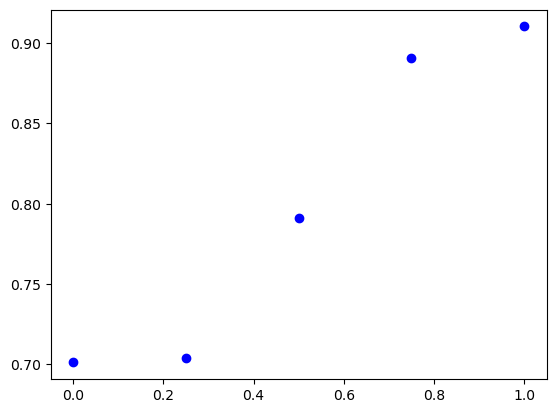

In [6]:
plt.figure()
plt.scatter(x, y, color='blue', label='Avg RT')
plt.xticks(x, rt_df.index)
plt.xlabel('Alpha')
plt.ylabel('Average RT')
plt.legend()
plt.show()

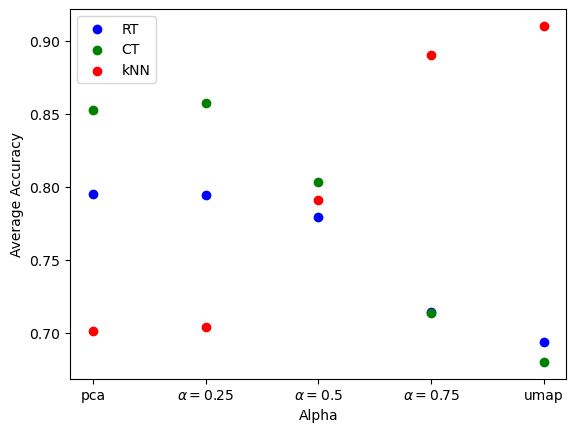

In [9]:
plt.figure()
metrics = ['rt', 'centr', 'knn']
color_map = {'rt': 'blue', 'centr':'green', 'knn':'red'}
label_map = {'rt': 'RT', 'centr':'CT', 'knn': 'kNN'}
metric_df = None
for metric in metrics:
    metric_df = up_df.groupby('algorithm')[metric].mean()# avg of metric
    # misnomer, this is a series    
    y = []
    for x_val in x:
        key = inv_x_map[x_val]
        y_val = metric_df[key]
        y.append(y_val)
    y = np.array(y)
    plt.scatter(x, y, color=color_map[metric], label= label_map[metric])
plt.xticks(x, x_map.keys())
plt.xlabel('Alpha')  
plt.ylabel('Average Accuracy')
plt.legend()
plt.show()